# DATA SCIENCE NIGERIA STAFF PROMOTION
By: **David Praise Chukwuma Kalu**

Kaggle no: **Account (User ID 1953581)**

## Prepare for data anlysis

In [35]:
# path to the file 
train_file_path = 'data/train.csv'
test_file_path = 'data/test.csv'
sample_submission_path = 'data/sample_submission2.csv'

### Loading Packages

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics   #Additional scklearn functions

import lightgbm as ltb

from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Load data
Let's load the train and test data files

In [37]:
# loading the data 
train_df = pd.read_csv(train_file_path, index_col='EmployeeNo')
test_df = pd.read_csv(test_file_path, index_col='EmployeeNo')

## Data Exploration

### Check the data
Let's check the train and test set

In [38]:
# checking the shape
print("Train size: " + str(train_df.shape))
print("Test size: "+ str(test_df.shape))

Train size: (38312, 18)
Test size: (16496, 17)


Let's glimpse train and test dataset.

In [39]:
train_df.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
EmployeeNo,,,,,,,,,,,,,,,,,,
YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [40]:
test_df.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
EmployeeNo,,,,,,,,,,,,,,,,,
YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


Changing the data type of the year of birth along with the year of recruitment

In [41]:
cols = ['Year_of_birth', 'Year_of_recruitment']

for col in cols:
    train_df[col] = train_df[col].astype('str')
    test_df[col] = test_df[col].astype('str')

Let's check if there are any missing data. We will also chech the type of data.

We check first train.

In [42]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [43]:
%%time
missing_data(train_df)

CPU times: user 105 ms, sys: 4.05 ms, total: 109 ms
Wall time: 108 ms


,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
Total,0,1679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,4.38244,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,int64,object,float64,object,int64,int64,int64,object,object,object,object,object,object,int64


In [44]:
%%time
missing_data(test_df)

CPU times: user 50.2 ms, sys: 150 µs, total: 50.4 ms
Wall time: 49.3 ms


,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
Total,0,730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,4.42532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,int64,object,float64,object,int64,int64,int64,object,object,object,object,object,object


There are missing data in train and test datasets in the column 'Qualification'. Let's handle them by replacing it with the most frequent value

In [45]:
degree_holders_train = train_df['Qualification'].value_counts().index[0]
degree_holders_test = test_df['Qualification'].value_counts().index[0]

print(degree_holders_train)
print(degree_holders_test)

First Degree or HND
First Degree or HND


In [46]:
train_df['Qualification'] = train_df['Qualification'].fillna(degree_holders_train)
test_df['Qualification'] = test_df['Qualification'].fillna(degree_holders_test)

In [47]:
print(train_df['Qualification'].value_counts())
print("\n------------\n")
print(test_df['Qualification'].value_counts())

First Degree or HND         27257
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

------------

First Degree or HND         11821
MSc, MBA and PhD             4456
Non-University Education      219
Name: Qualification, dtype: int64


In [48]:
%%time
missing_data(train_df)

CPU times: user 88.2 ms, sys: 4 µs, total: 88.2 ms
Wall time: 88 ms


,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,int64,object,float64,object,int64,int64,int64,object,object,object,object,object,object,int64


In [49]:
%%time
missing_data(test_df)

CPU times: user 40.3 ms, sys: 0 ns, total: 40.3 ms
Wall time: 39.3 ms


,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
Total,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,object,object,object,int64,object,float64,object,int64,int64,int64,object,object,object,object,object,object


Let's check the numerical values in train and test dataset.

In [50]:
train_df.describe()

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,7.698959,0.352996,0.023152,55.366465,0.084595
std,0.609443,3.744135,0.477908,0.150388,13.362741,0.278282
min,2.000000,0.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,5.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,7.500000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,10.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,12.500000,1.000000,1.000000,91.000000,1.000000


In [51]:
test_df.describe()

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average
count,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000
mean,2.251455,7.692016,0.349600,0.023218,55.433863
std,0.608865,3.734303,0.476858,0.150599,13.392306
min,2.000000,0.000000,0.000000,0.000000,31.000000
25%,2.000000,5.000000,0.000000,0.000000,43.000000
50%,2.000000,7.500000,0.000000,0.000000,52.000000
75%,2.000000,10.000000,1.000000,0.000000,68.000000
max,11.000000,12.500000,1.000000,1.000000,91.000000


### Making Visualization

checking frequency of each feature using bar chart

In [52]:
column_name = ['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment',
               'Trainings_Attended', 'Last_performance_score', 'Targets_met',
               'Previous_Award','Training_score_average', 'State_Of_Origin',
               'Foreign_schooled','Marital_Status', 'Past_Disciplinary_Action',
               'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
               'Promoted_or_Not'
              ]

In [53]:
def Make_Bar_Plot(data, column):
    for col in column:
        ax = data[col].value_counts().plot(kind='bar',
                                          figsize=(10,6),
                                          title="Bar Plot for '"+col+"'",
                                          color= 'r')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

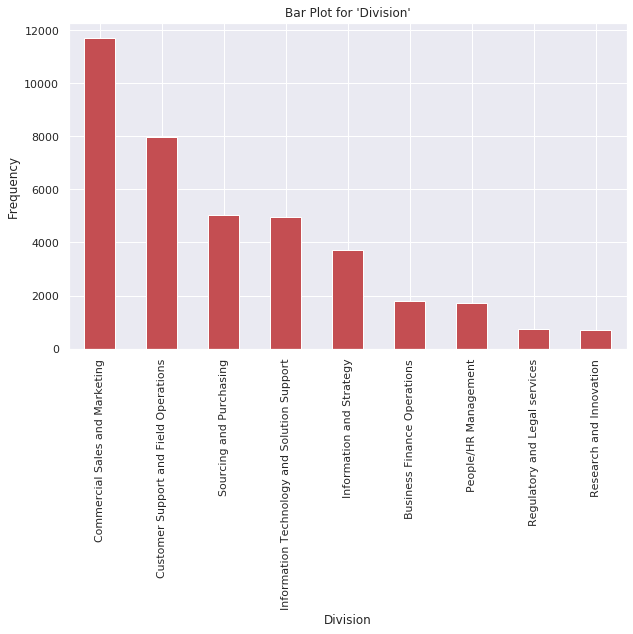

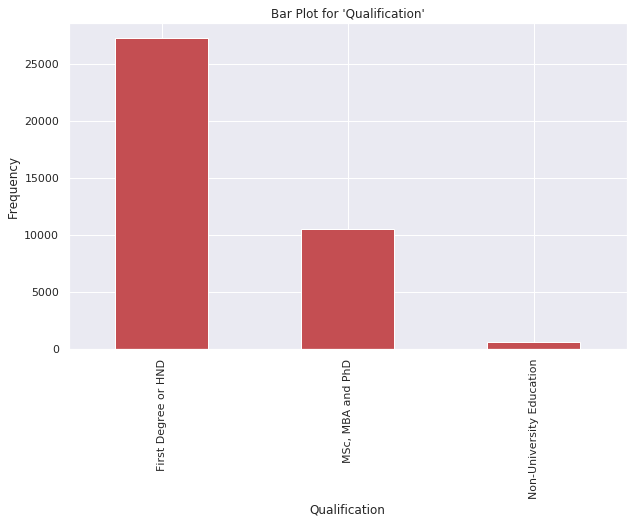

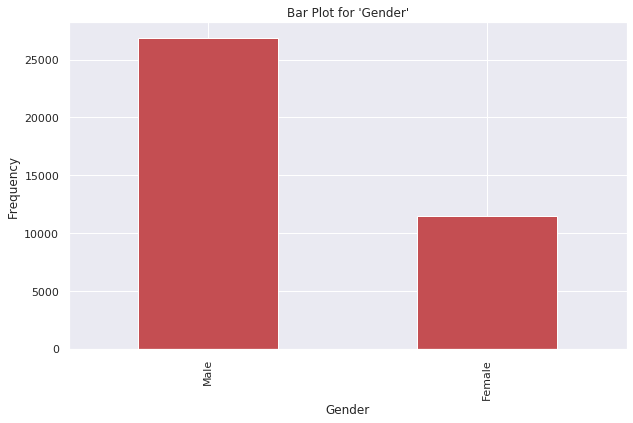

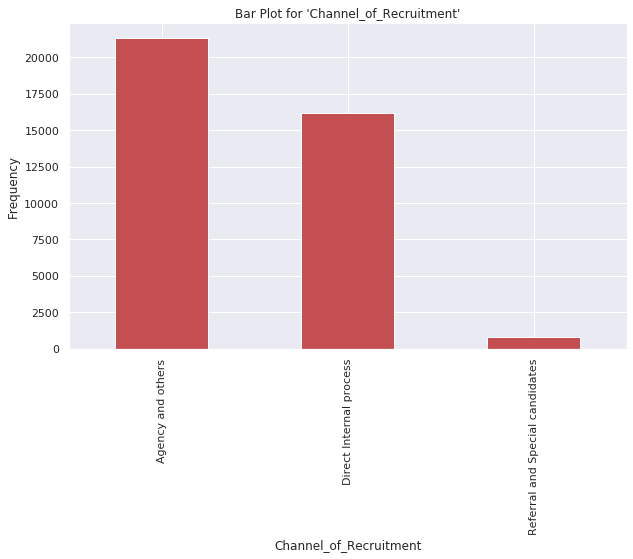

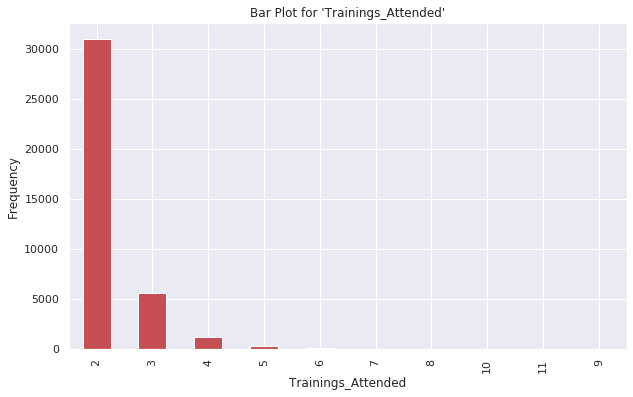

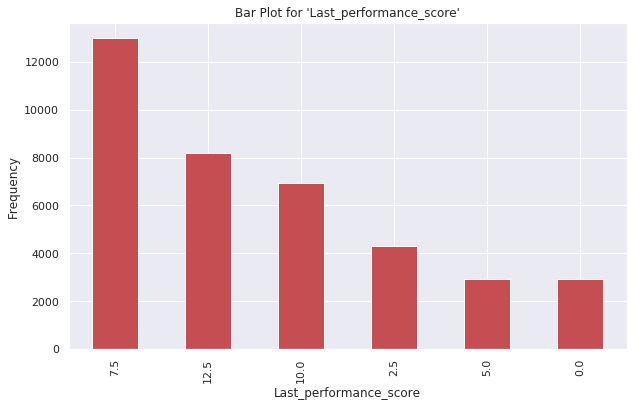

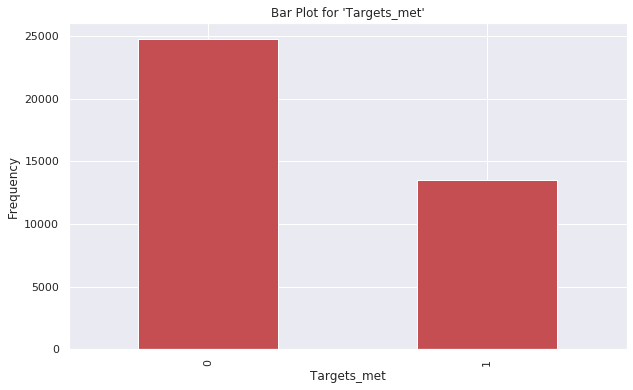

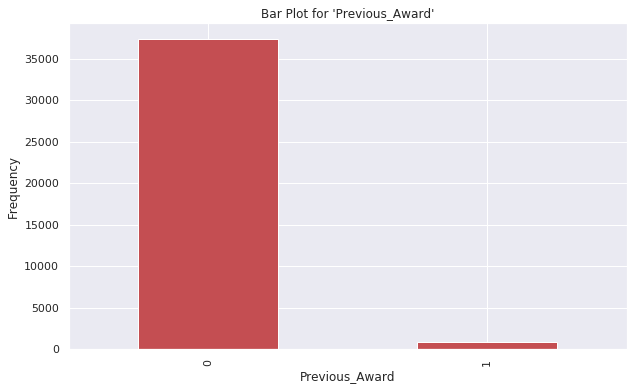

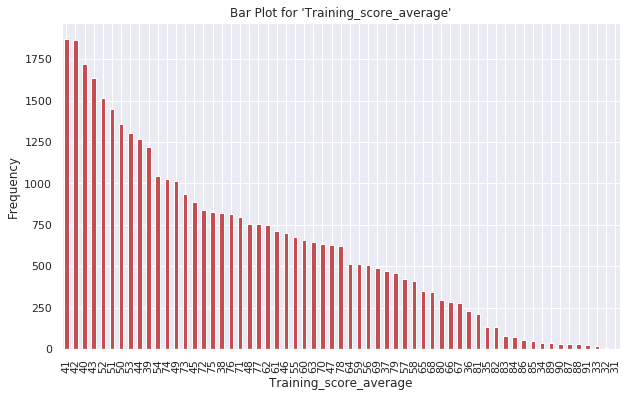

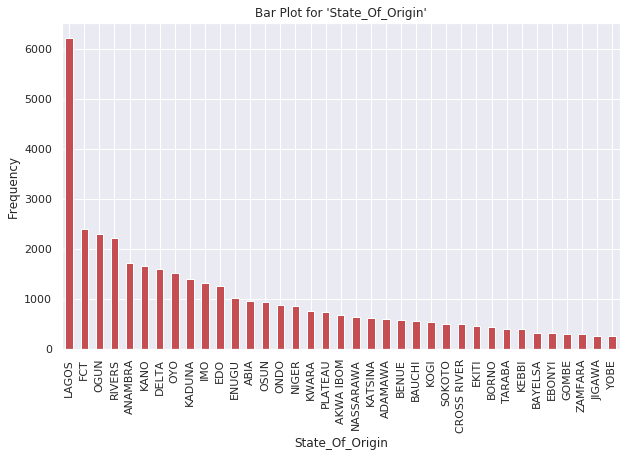

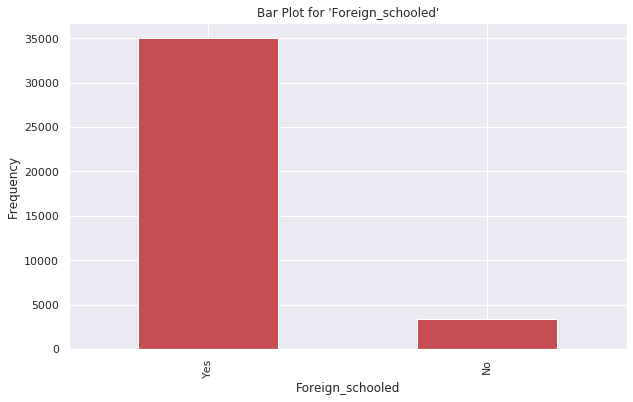

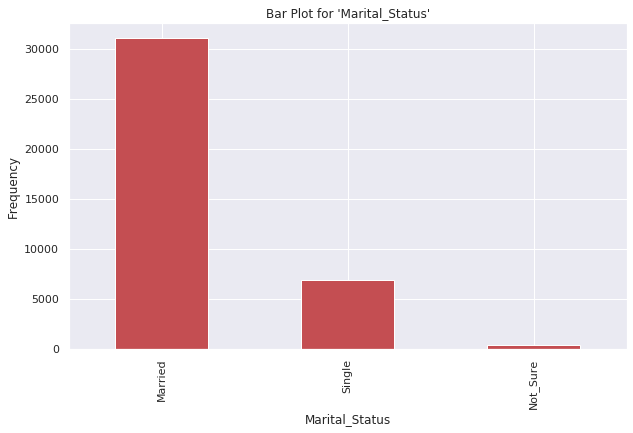

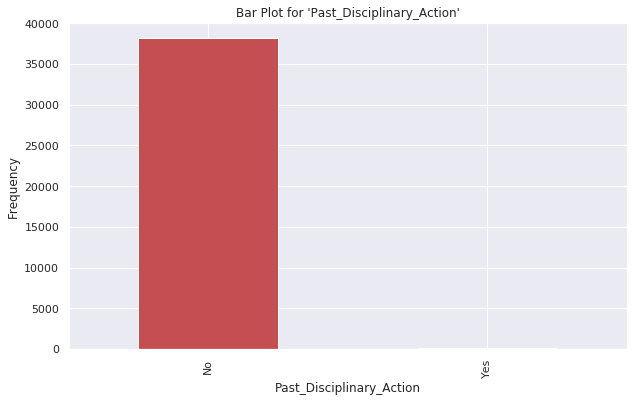

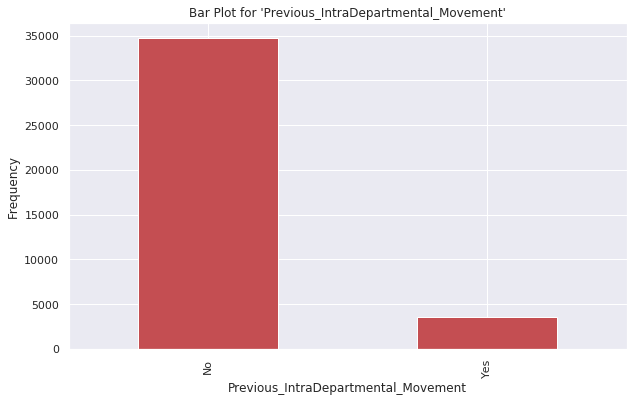

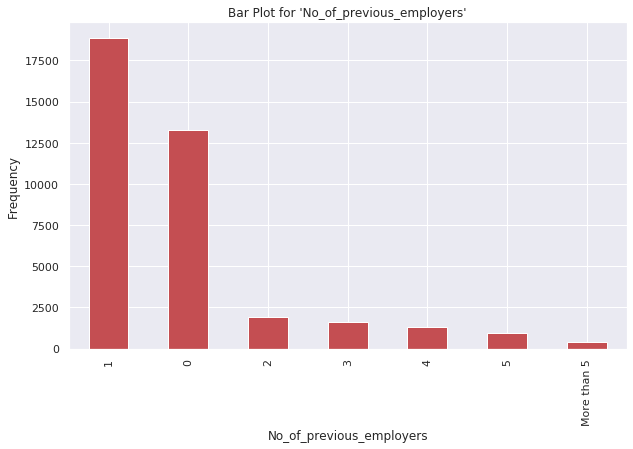

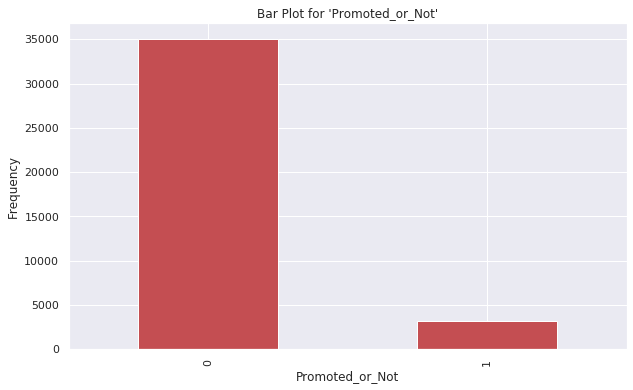

In [20]:
Make_Bar_Plot(train_df, column_name)

### Aggregating categorical variables and grouping the years into similar categories 

In [54]:
train_df['Year_of_birth'].value_counts().head()

1991    2544
1990    2506
1989    2441
1992    2380
1988    2268
Name: Year_of_birth, dtype: int64

* 1990-2001
* 1980-1989
* 1970-1979
* 1950-1969

In [55]:
dic_year = {'1991': '1990-2001', '1990': '1990-2001', '1989': '1980-1989', '1992': '1990-2001',
                   '1988': '1980-1989', '1987': '1980-1989', '1993': '1990-2001', '1994': '1990-2001',
                  '1986': '1980-1989', '1985': '1980-1989', '1984': '1980-1989', '1995': '1990-2001', 
                  '1983': '1980-1989', '1982': '1980-1989', '1981': '1980-1989', '1980': '1980-1989',
                  '1996': '1990-2001', '1979': '1970-1979', '1978': '1970-1979', '1977': '1970-1979',
                   '1976': '1970-1979', '1975': '1970-1979', '1997': '1990-2001', '1973': '1970-1979',
                   '1974': '1970-1979', '1971': '1970-1979', '1972': '1970-1979', '1970': '1970-1979',
                   '1969': '1950-1969', '1968': '1950-1969', '1998': '1990-2001', '1966': '1950-1969',
                   '1967': '1950-1969', '1965': '1950-1969', '1964': '1950-1969', '1963': '1950-1969',
                   '1961': '1950-1969', '1962': '1950-1969', '1999': '1990-2001', '2001': '1990-2001',
                   '2000': '1990-2001', '1957': '1950-1969', '1956': '1950-1969', '1955': '1950-1969',
                   '1950': '1950-1969', '1952':'1950-1969', '1958': '1950-1969', '1959': '1950-1969',
                   '1960': '1950-1969'}

In [56]:
train_df['Year_of_birth'] = [dic_year[x] for x in train_df['Year_of_birth']]
print(train_df['Year_of_birth'].value_counts())

print("\n-----------\n")

test_df['Year_of_birth'] = [dic_year[x] for x in test_df['Year_of_birth']]
print(test_df['Year_of_birth'].value_counts())

1980-1989    16611
1990-2001    15163
1970-1979     4853
1950-1969     1685
Name: Year_of_birth, dtype: int64

-----------

1980-1989    7172
1990-2001    6489
1970-1979    2057
1950-1969     778
Name: Year_of_birth, dtype: int64


### Putting the year of recruitment into groups

In [57]:
train_df['Year_of_recruitment'].value_counts().head()

2016    4916
2015    4757
2017    4656
2014    4101
2012    3909
Name: Year_of_recruitment, dtype: int64

In [58]:
dic_year_of_recruitment = {
                        '1982': '1982-2000', '1985': '1982-2000', '1986': '1982-2000', '1987': '1982-2000', 
                        '1988': '1982-2000', '1989': '1982-2000', '1990': '1982-2000', '1991': '1982-2000',
                        '1992': '1982-2000', '1993': '1982-2000', '1994': '1982-2000', '1995': '1982-2000',
                        '1996': '1982-2000', '1997': '1982-2000', '1998': '1982-2000', '1999': '1982-2000',
                        '2000': '1982-2000', '2001': '2001-2005', '2002': '2001-2005', '2003': '2001-2005',
                        '2004': '2001-2005', '2005': '2001-2005', '2006': '2006-2010', '2007': '2006-2010',
                        '2008': '2006-2010', '2009': '2006-2010', '2010': '2006-2010', '2011': '2011-2015',
                        '2012': '2011-2015', '2013': '2011-2015', '2014': '2011-2015', '2015': '2011-2015',
                        '2016': '2016-2018', '2017': '2016-2018', '2018': '2016-2018'
                       }

In [59]:
train_df['Year_of_recruitment'] = [dic_year_of_recruitment[x] for x in train_df['Year_of_recruitment']]
print(train_df['Year_of_recruitment'].value_counts())

print("\n-------------\n")

test_df['Year_of_recruitment'] = [dic_year_of_recruitment[x] for x in test_df['Year_of_recruitment']]
print(test_df['Year_of_recruitment'].value_counts())

2011-2015    18092
2016-2018    12766
2006-2010     5023
2001-2005     1754
1982-2000      677
Name: Year_of_recruitment, dtype: int64

-------------

2011-2015    7744
2016-2018    5498
2006-2010    2196
2001-2005     760
1982-2000     298
Name: Year_of_recruitment, dtype: int64


### Grouping the State of Origin into Similar parts of Nigeria

In [60]:
states = {
         'ABIA': 'EAST', 'ANAMBRA': 'EAST', 'DELTA': 'EAST', 'BAYELSA': 'EAST',
         'ENUGU': 'EAST', 'EBONYI': 'EAST', 'RIVERS': 'EAST', 'CROSS RIVER': 'EAST',
         'AKWA IBOM': 'EAST', 'IMO': 'EAST', 'KATSINA': 'NORTH', 'KANO': 'NORTH',
         'NIGER': 'NORTH', 'SOKOTO': 'NORTH', 'KANO': 'NORTH', 'KADUNA': 'NORTH',
         'BORNO': 'NORTH', 'TARABA':'NORTH', 'YOBE': 'NORTH', 'ADAMAWA': 'NORTH',
         'KEBBI': 'NORTH', 'JIGAWA': 'NORTH', 'ZAMFARA': 'NORTH','KEBBI': 'NORTH',
         'PLATEAU': 'NORTH', 'NASSARAWA': 'NORTH', 'FCT': 'NORTH', 'PLATEAU': 'NORTH',
         'BENUE': 'NORTH', 'KOGI':'NORTH', 'BAUCHI': 'NORTH', 'GOMBE': 'NORTH',
         'OYO': 'WEST', 'LAGOS': 'WEST', 'OGUN': 'WEST', 'OSUN': 'WEST',
         'EKITI': 'WEST', 'ONDO': 'WEST', 'KWARA': 'WEST', 'EDO': 'WEST'
         }


In [61]:
train_df['State_Of_Origin'] = [states[x] for x in train_df['State_Of_Origin']]
print(train_df['State_Of_Origin'].value_counts())

print("\n----------\n")

test_df['State_Of_Origin'] = [states[x] for x in test_df['State_Of_Origin']]
print(test_df['State_Of_Origin'].value_counts())

WEST     14297
NORTH    13402
EAST     10613
Name: State_Of_Origin, dtype: int64

----------

WEST     6259
NORTH    5684
EAST     4553
Name: State_Of_Origin, dtype: int64


### Grouping the Number of Previous Employers

In [62]:
employers = {'0': '0-1', '1': '0-1', '2': '2-3', '3': '2-3',
             '4': 'Greater than 3', '5': 'Greater than 3', 'More than 5': 'Greater than 5'}

train_df['No_of_previous_employers'] = [employers[x] for x in train_df['No_of_previous_employers']]
test_df['No_of_previous_employers'] = [employers[x] for x in test_df['No_of_previous_employers']]

print(train_df['No_of_previous_employers'].value_counts())
print(test_df['No_of_previous_employers'].value_counts())

0-1               32139
2-3                3505
Greater than 3     2267
Greater than 5      401
Name: No_of_previous_employers, dtype: int64
0-1               13931
2-3                1469
Greater than 3      940
Greater than 5      156
Name: No_of_previous_employers, dtype: int64


### Checking the count labels for class imbalance

In [63]:
train_df['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [64]:
# checking the shape
print("Train size: " + str(train_df.shape))
print("Test size: "+ str(test_df.shape))

Train size: (38312, 18)
Test size: (16496, 17)


### Create the target vector

In [65]:
y = np.array(train_df['Promoted_or_Not'].copy())

In [66]:
# checking the shape
print("Train size: " + str(train_df.shape))
print("Test size: "+ str(test_df.shape))

Train size: (38312, 18)
Test size: (16496, 17)


### Looking at attributes (EDA)

#### Based on this table we can see that the:

* People who are in the *Information Technology and Solution Support* have a (10.7%) chance of being promoted while the people in *People/HR Management and Regulatory and Legal services* have a lower chance of being promoted than other departments
* People with MSC, MBA and PHD have a (9.67%) chance of being promoted
* People with Referral and Special candidates have a (13.13%) chance of being promoted
* People who had a last performance score of 12.5 have a (15.82%) chance of being promoted
* People who are recurrited within the year 2016-2018 have a higher chance of being promoted
* People who meet the set annual target have a (16.92%) chance of being promoted
* People who had previous awards have a (44.87%) chance of being promoted
* An average score of >= 85 have a (90 - 100%) chance of being promoted


In [67]:
interested_columns = list(train_df.columns)
interested_columns.pop(0)
interested_columns.pop(-2)
#print(interested_columns)

for col in interested_columns:
    if train_df[col].dtype == 'object' or train_df[col].nunique():
        xx = train_df.groupby(col)['Promoted_or_Not'].value_counts().unstack(1)
        per_not_promoted = xx.iloc[:, 0] *100/xx.apply(lambda x: x.sum(), axis=1)
        per_promoted = xx.iloc[:, 1]*100/xx.apply(lambda x: x.sum(), axis=1)
        xx['%_0'] = per_not_promoted
        xx['%_1'] = per_promoted
        display(xx)

Promoted_or_Not,0,1,%_0,%_1
Qualification,,,,
First Degree or HND,25080,2177,92.013061,7.986939
"MSc, MBA and PhD",9457,1012,90.333365,9.666635
Non-University Education,534,52,91.126280,8.873720


Promoted_or_Not,0,1,%_0,%_1
Gender,,,,
Female,10414,1018,91.095171,8.904829
Male,24657,2223,91.729911,8.270089


Promoted_or_Not,0,1,%_0,%_1
Channel_of_Recruitment,,,,
Agency and others,19514,1796,91.572032,8.427968
Direct Internal process,14847,1347,91.682104,8.317896
Referral and Special candidates,710,98,87.871287,12.128713


Promoted_or_Not,0,1,%_0,%_1
Trainings_Attended,,,,
2,28264.0,2717.0,91.230109,8.769891
3,5220.0,411.0,92.701119,7.298881
4,1152.0,92.0,92.604502,7.395498
5,299.0,17.0,94.620253,5.379747
6,91.0,2.0,97.849462,2.150538
7,26.0,2.0,92.857143,7.142857
8,6.0,NaN,100.000000,NaN
9,4.0,NaN,100.000000,NaN
10,5.0,NaN,100.000000,NaN


Promoted_or_Not,0,1,%_0,%_1
Year_of_birth,,,,
1950-1969,1578,107,93.649852,6.350148
1970-1979,4502,351,92.767360,7.232640
1980-1989,15132,1479,91.096262,8.903738
1990-2001,13859,1304,91.400119,8.599881


Promoted_or_Not,0,1,%_0,%_1
Last_performance_score,,,,
0.0,2659,246,91.531842,8.468158
2.5,4266,59,98.635838,1.364162
5.0,2806,138,95.312500,4.687500
7.5,12059,934,92.811514,7.188486
10.0,6367,565,91.849394,8.150606
12.5,6914,1299,84.183611,15.816389


Promoted_or_Not,0,1,%_0,%_1
Year_of_recruitment,,,,
1982-2000,630,47,93.057607,6.942393
2001-2005,1632,122,93.044470,6.955530
2006-2010,4586,437,91.300020,8.699980
2011-2015,16606,1486,91.786425,8.213575
2016-2018,11617,1149,90.999530,9.000470


Promoted_or_Not,0,1,%_0,%_1
Targets_met,,,,
0,23835,953,96.155398,3.844602
1,11236,2288,83.081928,16.918072


Promoted_or_Not,0,1,%_0,%_1
Previous_Award,,,,
0,34582,2843,92.403474,7.596526
1,489,398,55.129651,44.870349


Promoted_or_Not,0,1,%_0,%_1
Training_score_average,,,,
31,1.0,NaN,100.000000,NaN
32,5.0,NaN,100.000000,NaN
33,17.0,1.0,94.444444,5.555556
34,39.0,2.0,95.121951,4.878049
35,129.0,7.0,94.852941,5.147059
36,225.0,6.0,97.402597,2.597403
37,453.0,19.0,95.974576,4.025424
38,795.0,25.0,96.951220,3.048780
39,1167.0,52.0,95.734208,4.265792


Promoted_or_Not,0,1,%_0,%_1
State_Of_Origin,,,,
EAST,9703,910,91.425610,8.574390
NORTH,12291,1111,91.710193,8.289807
WEST,13077,1220,91.466741,8.533259


Promoted_or_Not,0,1,%_0,%_1
Foreign_schooled,,,,
No,3046,271,91.829967,8.170033
Yes,32025,2970,91.513073,8.486927


Promoted_or_Not,0,1,%_0,%_1
Marital_Status,,,,
Married,28386,2636,91.502804,8.497196
Not_Sure,324,39,89.256198,10.743802
Single,6361,566,91.829075,8.170925


Promoted_or_Not,0,1,%_0,%_1
Past_Disciplinary_Action,,,,
No,34936,3225,91.548964,8.451036
Yes,135,16,89.403974,10.596026


Promoted_or_Not,0,1,%_0,%_1
Previous_IntraDepartmental_Movement,,,,
No,31747,2962,91.466190,8.533810
Yes,3324,279,92.256453,7.743547


Promoted_or_Not,0,1,%_0,%_1
Promoted_or_Not,,,,
0,35071.0,NaN,100.0,NaN
1,NaN,3241.0,NaN,100.0


Dropping the 'Promoted_or_Not' Vector

In [0]:
train_df = train_df.drop(columns=['Promoted_or_Not'])

### Encoding all Categoritcal Variables Before fitting into a model

In [68]:
categorical_columns = ['Gender', 'Channel_of_Recruitment',
                       'State_Of_Origin','Foreign_schooled', 'Marital_Status',
                       'Past_Disciplinary_Action','Previous_IntraDepartmental_Movement',
                       'Year_of_birth', 'Year_of_recruitment', 
                       'No_of_previous_employers', 'Qualification', 'Division']

In [69]:
def encode_categorical_variables(df, columns):

    # label_encoder object knows how to understand word labels. 
    label_encoder = preprocessing.LabelEncoder() 

    # Encode labels in column 'species'. 
    for col in columns:
        df[col] = label_encoder.fit_transform(df[col])
        print(col)
        print(df[col].unique())
    return df

In [70]:
train_df = encode_categorical_variables(train_df, categorical_columns)

Gender
[0 1]
Channel_of_Recruitment
[1 0 2]
State_Of_Origin
[0 1 2]
Foreign_schooled
[0 1]
Marital_Status
[0 2 1]
Past_Disciplinary_Action
[0 1]
Previous_IntraDepartmental_Movement
[0 1]
Year_of_birth
[2 3 1 0]
Year_of_recruitment
[3 2 4 1 0]
No_of_previous_employers
[0 2 1 3]
Qualification
[1 0 2]
Division
[1 2 4 3 8 0 5 7 6]


In [71]:
train_df.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
EmployeeNo,,,,,,,,,,,,,,,,,,
YAK/S/00001,1,1,0,1,2,2,12.5,3,1,0,41,0,0,0,0,0,0,0
YAK/S/00002,2,0,1,0,2,3,12.5,3,0,0,52,0,1,0,0,0,0,0
YAK/S/00003,1,0,1,1,2,2,7.5,3,0,0,42,1,1,0,0,0,0,0
YAK/S/00004,1,0,1,0,3,2,2.5,2,0,0,42,1,1,2,0,0,0,0
YAK/S/00006,4,0,1,1,3,3,7.5,3,0,0,77,0,1,0,0,0,0,0


In [72]:
test_df = encode_categorical_variables(test_df, categorical_columns)

Gender
[1 0]
Channel_of_Recruitment
[0 1 2]
State_Of_Origin
[1 2 0]
Foreign_schooled
[1 0]
Marital_Status
[0 2 1]
Past_Disciplinary_Action
[0 1]
Previous_IntraDepartmental_Movement
[0 1]
Year_of_birth
[1 3 2 0]
Year_of_recruitment
[4 3 2 0 1]
No_of_previous_employers
[0 1 2 3]
Qualification
[0 1 2]
Division
[3 7 2 1 8 0 5 4 6]


In [73]:
test_df.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
EmployeeNo,,,,,,,,,,,,,,,,,
YAK/S/00005,3,0,1,0,2,1,7.5,4,0,0,65,1,1,0,0,0,0
YAK/S/00011,3,0,1,1,2,3,0.0,4,0,0,69,2,1,0,0,0,0
YAK/S/00015,7,1,1,1,2,2,7.5,3,0,0,76,1,1,0,0,0,0
YAK/S/00016,2,0,1,0,2,2,2.5,2,0,0,52,0,0,2,0,0,0
YAK/S/00017,3,0,1,0,2,2,7.5,3,1,0,69,1,1,0,0,0,0


### Getting our model Ready

In [74]:
X = train_df.copy()

print(X.shape)
print(y.shape)

(38312, 18)
(38312,)


In [75]:
X.to_csv('Sample.csv')

In [0]:
## Randomly sample cases to create independent training and test data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [44]:
"""
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)"""

'\nprint(X_train.shape)\nprint(X_test.shape)\nprint(y_train.shape)\nprint(y_test.shape)'

### XGBoost Training and Optimization

In [45]:
# fit a lightGBM model to the data
model = ltb.LGBMClassifier()
model.fit(X, y)
print(); print(model)

"""
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

# summarize the fit of the model
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))
"""


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


'\n# make predictions\nexpected_y  = y_test\npredicted_y = model.predict(X_test)\n\n# summarize the fit of the model\nprint(); print(metrics.classification_report(expected_y, predicted_y))\nprint(); print(metrics.confusion_matrix(expected_y, predicted_y))\n'

### Test Prediction

In [0]:
test_pred=model.predict(test_df).astype(int)

In [47]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

### Saving the Results

In [0]:
result = pd.read_csv(sample_submission_path)
result.EmployeeNo = test_df.index
result.Promoted_or_Not = test_pred
result.to_csv('intercampus1.csv', index = False)